# Finding Donors for *CharityML*
## EDA Version 0
### Kebei Jiang 05/17/2019

### Goal

The goal of this notebook is to do initial EDA of the data. More importantly, I am trying to follow this [instruction](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#one) and later build my own EDA flow/template.

### Get Started

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article [_"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). 

First thing first, I double checked the [origin](https://www.kaggle.com/uciml/adult-census-income) of the original dataset and made following observations.  
1. It was extracted from 1994 Census bureau database and was used as an example in aforementioned paper.  
2. The _'fnlwgt'_ feature is the number of people in full population the census takers believe that observation represents. It can be ignored for the purpose of this project.  
3. The _'census.csv'_ dataset is about the same size as the dataset used in the paper, minus some records with missing or ill-formatted entries.

-----

### 0, data head and description

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries for visulization
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load the Census dataset
data = pd.read_csv("census.csv")

display(data.head(n=5))
display(data.describe())
print('Raw data has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
2   38            Private         HS-grad            9.0             Divorced   
3   53            Private            11th            7.0   Married-civ-spouse   
4   28            Private       Bachelors           13.0   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male        2174.0   
1     Exec-managerial         Husband   White     Male           0.0   
2   Handlers-cleaners   Not-in-family   White     Male           0.0   
3   Handlers-cleaners         Husband   Black     Male           0.0   
4      Prof-specialty            Wife   Black   Female           0.0   

   capital-loss  hours-per-week  native-country income  
0           0.0            40.0   United-States  <=50K  
1           0.0            13.0   United-States  <=50K  
2           0.0            40.0   United-States  <=50K  
3           0.0            40.0   United-States  <=50K  
4           0.0            40.0            Cuba  <=50K

age  education-num  capital-gain  capital-loss  hours-per-week
count  45222.000000   45222.000000  45222.000000  45222.000000    45222.000000
mean      38.547941      10.118460   1101.430344     88.595418       40.938017
std       13.217870       2.552881   7506.430084    404.956092       12.007508
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       47.000000      13.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000

Raw data has 45222 rows and 14 columns.


**observation**: no missing or ill-formatted entries. no cleansing needed.

-------

### 1, Variable Identification

In [3]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [4]:
for col in data.columns.values:
    print('{} has {} unique values:\n {}\n '.format(col, data[col].nunique(), data[col].unique()))

age has 74 unique values:
 [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]
 
workclass has 7 unique values:
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
 
education_level has 16 unique values:
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
 
education-num has 16 unique values:
 [13.  9.  7. 14.  5. 10. 12.  4. 16. 11. 15.  3.  6.  1.  8.  2.]
 
marital-status has 7 unique values:
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 
occupation has 14 unique values:
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'

In [5]:
ft_num = data.select_dtypes(include=['int64','float64']).columns.values
ft_cat = data.select_dtypes(exclude=['int64','float64']).columns.values

#print(ft_num)
#print(ft_cat)

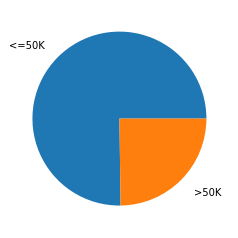

count    45222.000000
mean         0.247844
std          0.431766
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income_binary, dtype: float64

In [6]:
data['income_binary'] = [0 if x =='<=50K' else 1 for x in data['income']]
u, u_count = np.unique(data['income_binary'], return_counts=True)
plt.pie(u_count, labels=['<=50K', '>50K'], pctdistance=1.1, labeldistance=1.2)
plt.show()
data['income_binary'].describe()

**observation**:  
 * skewed target variable, need to pay attetion to the skewness while modeling

-------

 ### 2a, Univariate Analysis: continuous

In [7]:
print('numerical features are: {}'.format(ft_num))

numerical features are: ['age' 'education-num' 'capital-gain' 'capital-loss' 'hours-per-week']


### ages

In [8]:
age_bins = np.linspace(10, 90, 9)
age_lt50k = np.digitize(data[data['income']=='<=50K']['age'], age_bins)
age_gt50k = np.digitize(data[data['income']=='>50K']['age'], age_bins)
_, age_lt50k_counts = np.unique(age_lt50k, return_counts=True)
_, age_gt50k_counts = np.unique(age_gt50k, return_counts=True)

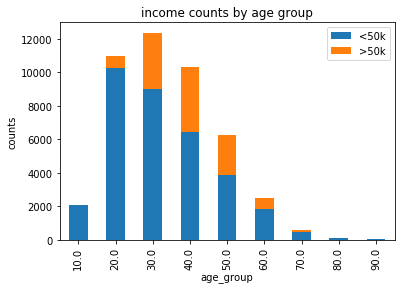

In [9]:
tmp = pd.DataFrame(np.column_stack([age_bins, age_lt50k_counts, age_gt50k_counts]), columns=['age_group', '<50k', '>50k'])
ax = tmp.plot.bar(x='age_group', stacked=True)
ax.set_xlabel('age_group')
ax.set_ylabel('counts')
ax.set_title('income counts by age group')
plt.show()

**observation**:  
 * people younger than 20 or older than 70 make less than the rest of the population, which agrees with common sense.

### educations

In [10]:
edu_num_cts = data.groupby(['education-num'])['income'].value_counts().reset_index(name='count')
edu_num_lt50k = edu_num_cts.loc[edu_num_cts['income']=='<=50K']['count']
edu_num_gt50k = edu_num_cts.loc[edu_num_cts['income']=='>50K']['count']

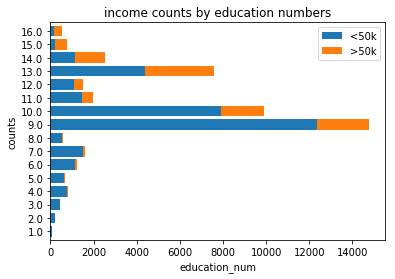

In [11]:
tmp = pd.DataFrame(np.column_stack([edu_num_cts['education-num'].unique(), edu_num_lt50k, edu_num_gt50k, edu_num_gt50k.values/edu_num_lt50k.values]), columns=['education_num', '<50k', '>50k', 'ratio'])
#plt.subplot(211)
ax = tmp[tmp.columns.drop('ratio')].plot.barh(x='education_num', stacked=True, width=0.8)
ax.set_xlabel('education_num')
ax.set_ylabel('counts')
ax.set_title('income counts by education numbers')
plt.show()

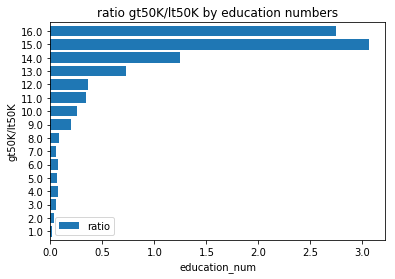

In [12]:
ax = tmp[['education_num','ratio']].plot.barh(x='education_num', width=0.8)
ax.set_xlabel('education_num')
ax.set_ylabel('gt50K/lt50K')
ax.set_title('ratio gt50K/lt50K by education numbers')
plt.show()

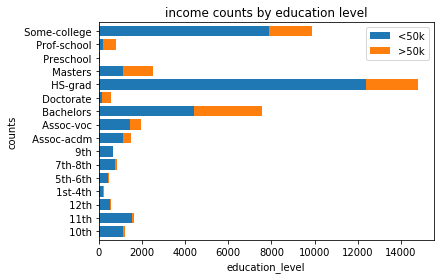

In [13]:
edu_lvl_cts = data.groupby(['education_level'])['income'].value_counts().reset_index(name='count')
edu_lvl_lt50k = edu_lvl_cts.loc[edu_lvl_cts['income']=='<=50K']['count']
edu_lvl_gt50k = edu_lvl_cts.loc[edu_lvl_cts['income']=='>50K']['count']

tmp = pd.DataFrame(np.column_stack([edu_lvl_cts['education_level'].unique(), edu_lvl_lt50k, edu_lvl_gt50k]), columns=['education_level', '<50k', '>50k'])
#plt.subplot(211)
ax = tmp.plot.barh(x='education_level', stacked=True, width=0.8)
ax.set_xlabel('education_level')
ax.set_ylabel('counts')
ax.set_title('income counts by education level')
plt.show()

**observation**:   
 *  _education-level_ and _education-num_ carry the same information, can drop either one.  
 *  higher educational level, higher chance of earning more than 50K

### capital investments

In [14]:
(data['capital-gain']*data['capital-loss']).sum()

0.0

* gain and loss cannot be both non-zero, which means we are dealing with the _net_ income from capital investment.   
* people with zero gain and loss are simply outta market   
**Q**: shall we combine these two into one? i.e., _capital = _capital-gain + (-1)*capital-loss_? We can think about it during correlation QC.

how many zeros do we have?

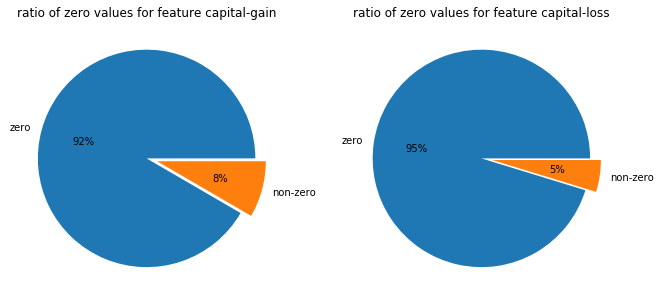

In [15]:
fig = plt.figure(figsize = (11,5))

for i, ft in enumerate(['capital-gain', 'capital-loss']):
    count1 = np.sum([x == 0 for x in data[ft]])
    count2 = np.sum([x != 0 for x in data[ft]])
    
    radius = 1  # the whole dataset
    
    ax = fig.add_subplot(1, 2, i+1)
    ax.pie([count1, count2], labels=['zero', 'non-zero'], autopct='%.0f%%', shadow=False, explode=(0, 0.1), radius=radius)
    ax.set_title('ratio of zero values for feature {}'.format(ft))

and to visualize their distributions:

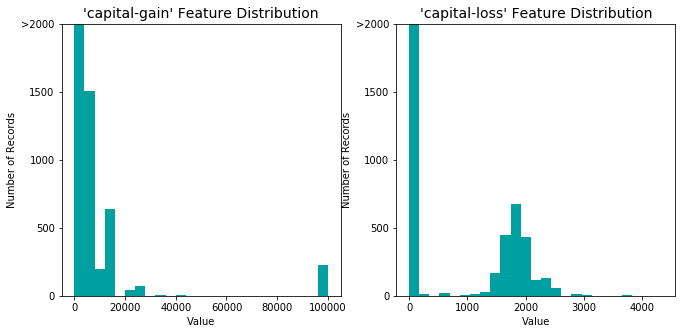

In [16]:
# Create figure
fig = plt.figure(figsize = (11,5))

# Skewed feature plotting
for i, feature in enumerate(['capital-gain','capital-loss']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(data[feature], bins = 25, color = '#00A0A0')
    ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")
    ax.set_ylim((0, 2000))
    ax.set_yticks([0, 500, 1000, 1500, 2000])
    ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

The distribution looks extremely skewed because of the zero values. Shall we treat the zero values separately? 

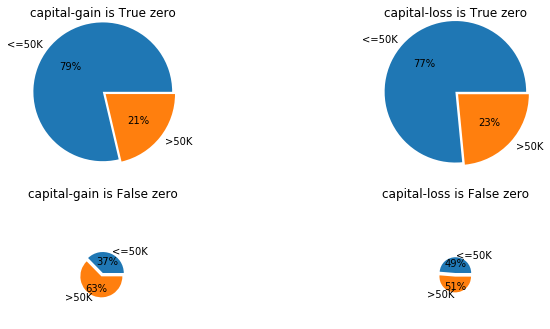

In [17]:
import operator as ops

fig = plt.figure(figsize = (11,5))

for i, op in enumerate([ops.eq, ops.ne]):
    for j, ft in enumerate(['capital-gain', 'capital-loss']):
        count = data[op(data[ft],0)].groupby('income')['income'].value_counts()

        radius = 2*np.sqrt(np.sum(count)/data.shape[0])  # size of the pie is proportional to the size of the dataset

        ax = fig.add_subplot(2, 2, i*2+j+1)
        ax.pie(count, labels=['<=50K', '>50K'], radius=radius, autopct='%.0f%%', shadow=False, explode=(0, 0.1))
        ax.set_title('{} is {} zero'.format((ft), op(0,0)), loc='center', pad=30)

plt.subplots_adjust(hspace=1, wspace=0.35)

The ratios of income classes are quite different when capital is not zero. This may suggest removing zero values or create a new category.  
Finally, let's look at the distribution of these two features with zero values removed.

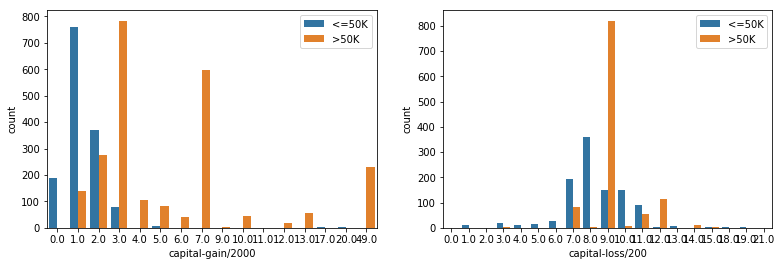

In [18]:
import seaborn as sns
data['capital-gain-digitized']=data['capital-gain']//2000
data['capital-loss-digitized']=data['capital-loss']//200

fig = plt.figure(figsize = (13,4))
plt.subplot(121)
ax = sns.countplot(x='capital-gain-digitized', hue='income', data=data[~data['capital-gain'].isin([0])])
ax.set(xlabel='capital-gain/2000')
plt.legend(loc='upper right')
plt.subplot(122)
ax = sns.countplot(x='capital-loss-digitized', hue='income', data=data[~data['capital-loss'].isin([0])])
ax.set(xlabel='capital-loss/200')
plt.legend(loc='upper right')
plt.show()

A few things came to my notice:  
 * people with high _capital-gain_ tend to earn more income; however, there're a few low incomers which can be potential outliers  
 * _capital-loss_ is not a good indicator for income classes

**Observations**  
 * gain and loss are the net income from capital investment. People with zero gain and loss are simply outta market. (May consider combining these two into one, i.e., _capital = capital-gain + (-1)*capital-loss._ )  
 * The ratios of income classes are quite different when capital is not zero. This may suggest removing zero values or create a new category.  
 * Possible outliers with high _capital-gain_ but low income.

### hours-per-week

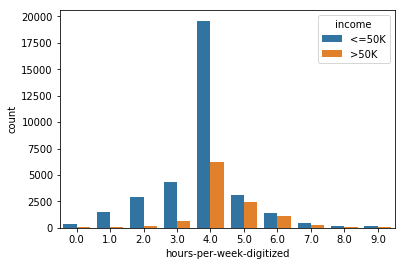

In [19]:
data['hours-per-week-digitized'] = data['hours-per-week']//10
sns.countplot(x='hours-per-week-digitized', hue='income', data=data)
plt.show()

                           sum  count      ratio
hours-per-week-digitized                        
0.0                         45    445  10.112360
1.0                         89   1555   5.723473
2.0                        195   3068   6.355932
3.0                        645   5019  12.851166
4.0                       6241  25840  24.152477


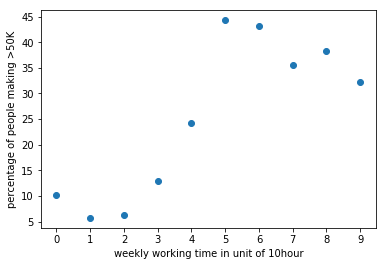

In [20]:
# to plot the ratio between two income classes by 'hours-per-week-digitized'
# 'sum' counts the '>50K' occurrence; 'count' counts both cases
tmp = data.groupby(['hours-per-week-digitized'])['income_binary'].agg(['sum', 'count'])
tmp['ratio'] = tmp['sum']/tmp['count']*100
print(tmp.head())

plt.scatter(tmp.index.values, tmp['ratio'])
plt.xlabel('weekly working time in unit of 10hour')
plt.ylabel('percentage of people making >50K')
plt.xticks(range(10))
plt.show()

**Observations**  
 * People working more than 40 hours tend to have higher incomes, which makes sense
 * are the working hours and _occupation_ significantly correlated? need to check in later sections

**groupby tricks**  
 * [unstack()](#another_cell)
 * https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby  
 * https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby  
 * https://stackoverflow.com/questions/33217702/groupby-in-pandas-with-different-functions-for-different-columns  
 * https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step

In [21]:
tmp = data.groupby(['hours-per-week-digitized'])['income_binary', 'workclass'].agg({'income_binary':['sum', 'count'], 'workclass':'count'})
print(tmp)
tmp.columns

                         income_binary        workclass
                                   sum  count     count
hours-per-week-digitized                               
0.0                                 45    445       445
1.0                                 89   1555      1555
2.0                                195   3068      3068
3.0                                645   5019      5019
4.0                               6241  25840     25840
5.0                               2489   5621      5621
6.0                               1099   2541      2541
7.0                                231    648       648
8.0                                110    287       287
9.0                                 64    198       198


MultiIndex(levels=[['income_binary', 'workclass'], ['count', 'sum']],
           labels=[[0, 0, 1], [1, 0, 0]])

In [22]:
tmp.index

Float64Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype='float64', name='hours-per-week-digitized')

 ### 2b, Univariate Analysis: categorical

In [22]:
ft_cat

array(['workclass', 'education_level', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype=object)

### Wrok class

See how work class is distributed and how is it related to income classes. Meanwhile, the _unstack()_ function is very handy.<a id='another_cell'></a>

In [159]:
grouped = data.groupby(['workclass', 'income'])['income'].agg('count')
print(type(grouped))
display(grouped)
grouped = grouped.unstack()   # very important trick
display(grouped)     # print won't work here
print(grouped.index)

<class 'pandas.core.series.Series'>


workclass          income
 Federal-gov       <=50K       857
                   >50K        549
 Local-gov         <=50K      2185
                   >50K        915
 Private           <=50K     26056
                   >50K       7251
 Self-emp-inc      <=50K       734
                   >50K        912
 Self-emp-not-inc  <=50K      2737
                   >50K       1059
 State-gov         <=50K      1426
                   >50K        520
 Without-pay       <=50K        19
                   >50K          2
Name: income, dtype: int64

income             <=50K  >50K
workclass                     
 Federal-gov         857   549
 Local-gov          2185   915
 Private           26056  7251
 Self-emp-inc        734   912
 Self-emp-not-inc   2737  1059
 State-gov          1426   520
 Without-pay          19     2

Index([' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype='object', name='workclass')


<Figure size 288x288 with 0 Axes>

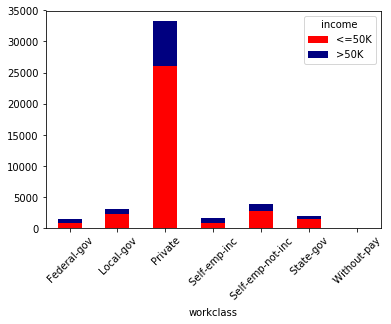

In [160]:
fig = plt.figure(figsize = (4,4))

grouped.plot.bar(stacked=True, color=['red','navy'])
plt.xticks(rotation=45)
plt.show()

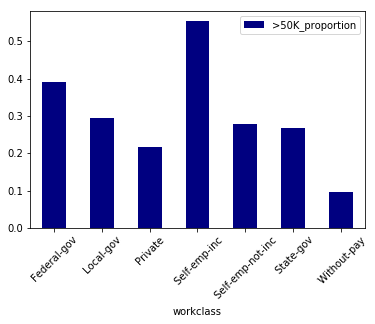

In [161]:
grouped['>50K_proportion'] = np.divide(grouped['>50K'], grouped['>50K'] + grouped['<=50K'])
grouped.plot.bar(y='>50K_proportion', color='navy', figsize = (6,4))
plt.xticks(rotation=45)
plt.show()

**Observations** 

Apparently, we have a lot of 'private' workers. This give me a better understanding of the classes:  
 * 'gov' related: federal level has higher income than local and state  
 * 'private' is privately owned companies, they make up most of the population and has the 2nd lowest >50K proportion.  
 * the difference between 'self-emp-inc' and 'self-emp-not-inc' are summarized in this [article](https://smallbiztrends.com/2013/11/incorporated-versus-unincorporated-self-employment.html).  
 * 'Without-pay' should be related to age?

### marital-status

In [165]:
grouped = data.groupby(['marital-status', 'income'])['income'].agg('count')
grouped = grouped.unstack()   # very important trick
display(grouped)     # print won't work here

income                  <=50K  >50K
marital-status                     
 Divorced                5642   655
 Married-AF-spouse         18    14
 Married-civ-spouse     11491  9564
 Married-spouse-absent    498    54
 Never-married          13897   701
 Separated               1312    99
 Widowed                 1156   121

<Figure size 288x288 with 0 Axes>

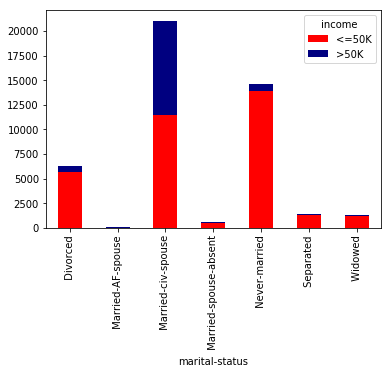

In [168]:
fig = plt.figure(figsize = (4,4))
grouped.plot.bar(stacked=True, color=['red','navy'])
plt.xticks(rotation=90)
plt.show()

**observations**  
 * Married-AF-spouse = Armed Forces, Married-civ-spouse = Civilian   
 * see how 'Married-civ-spouse' earns way more than any other category? We are dealing with **househould** income!  
 * So the person listed is the bread winner of the household? Do we have people from the same family?


###  relationship

In [170]:
grouped = data.groupby(['relationship', 'income'])['income'].agg('count')
grouped = grouped.unstack()   # very important trick
display(grouped)     # print won't work here

income           <=50K  >50K
relationship                
 Husband         10159  8507
 Not-in-family   10474  1228
 Other-relative   1299    50
 Own-child        6521   105
 Unmarried        4486   302
 Wife             1075  1016

<Figure size 288x288 with 0 Axes>

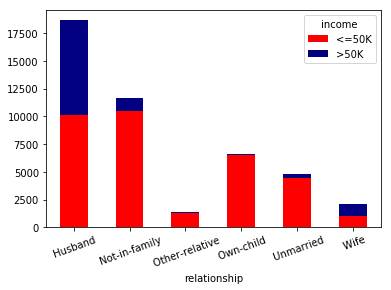

In [179]:
fig = plt.figure(figsize = (4,4))
grouped.plot.bar(stacked=True, color=['red','navy'])
plt.xticks(rotation=20)
plt.show()

**Observations**  
 * apparently, children cost? This is a strong indicator.  
 * this must be strongly related to the 'marital-status', we'll deal with them during bi-variate stage

###  occupation

<Figure size 288x288 with 0 Axes>

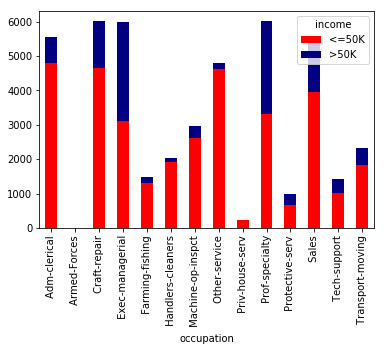

In [193]:
grouped = data.groupby(['occupation', 'income'])['income'].agg('count')
grouped = grouped.unstack()   # very important trick
#display(grouped)     # print won't work here

fig = plt.figure(figsize = (4,4))
grouped.plot.bar(stacked=True, color=['red','navy'])
plt.xticks(rotation=90)
plt.show()

**observation**  
 * another strong indicator

###  race

<Figure size 288x288 with 0 Axes>

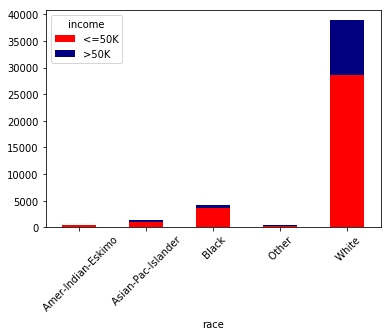

In [198]:
grouped = data.groupby(['race', 'income'])['income'].agg('count')
grouped = grouped.unstack()   # very important trick
#display(grouped)     # print won't work here

fig = plt.figure(figsize = (4,4))
grouped.plot.bar(stacked=True, color=['red','navy'])
plt.xticks(rotation=45)
plt.show()

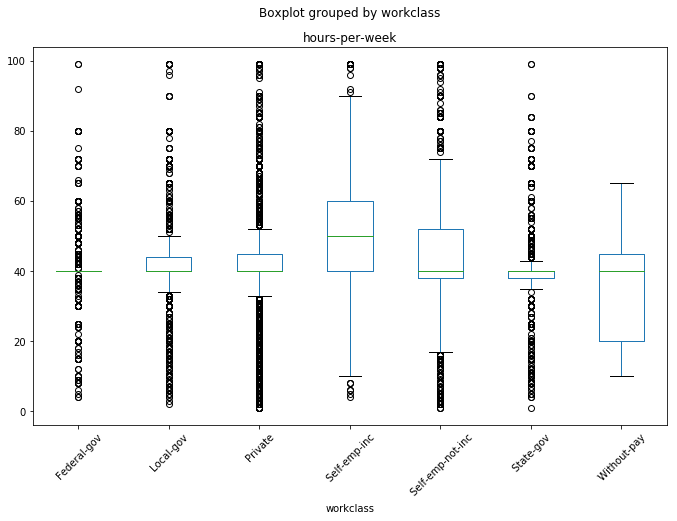

In [85]:
data.boxplot(by='workclass', column='hours-per-week', figsize=(11, 7), grid=False, rot=45, fontsize=10)
plt.show()

no strong correlation between workclass and working hours-per-week

In [26]:
data['workclass'].values

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

(array([  56.,  173.,   69., 1242.,  132.,  165.,   64.,   30.,   11.,
           4.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

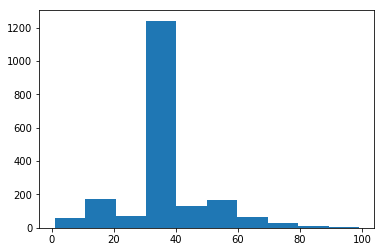

In [36]:
plt.hist(data[(data['workclass']==' State-gov')]['hours-per-week'])

In [57]:
data.groupby('workclass')['hours-per-week'].mean()

workclass
 Federal-gov         41.433144
 Local-gov           40.865484
 Private             40.258925
 Self-emp-inc        48.578372
 Self-emp-not-inc    44.429136
 State-gov           39.121788
 Without-pay         33.952381
Name: hours-per-week, dtype: float64

 ### 3, Bi-variate Analysis

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [ ]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.